In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


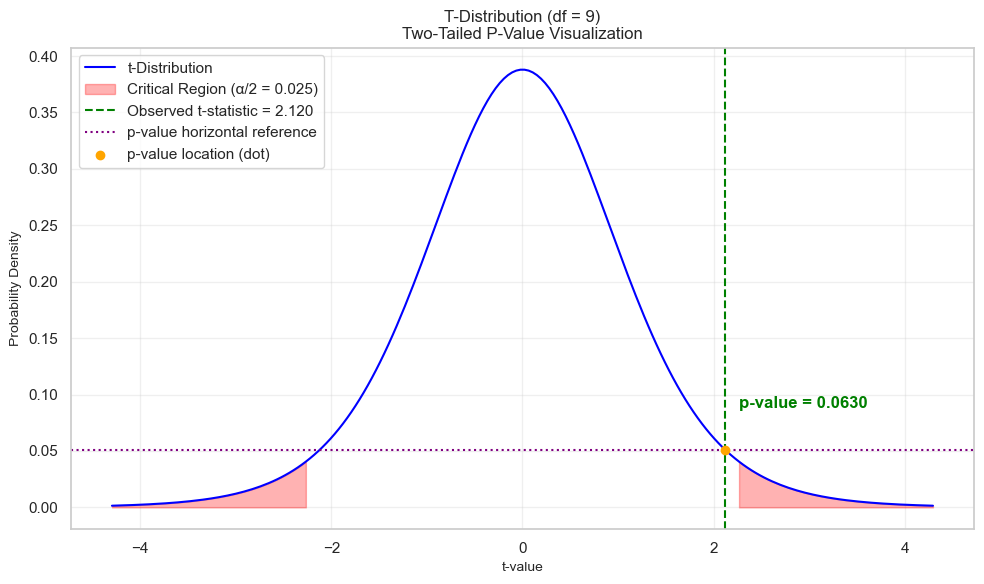

Actual t-statistic: 2.1202
Degrees of Freedom: 9
Calculated p-value: 0.0630


In [43]:
def t_distribution_visualization(t_statistic, degrees_of_freedom, alpha=0.05):
    """
    Visualize the t-distribution and highlight p-value and critical regions.

    Parameters:
    - t_statistic: Observed t-statistic from the paired t-test
    - degrees_of_freedom: Degrees of freedom (n-1)
    - alpha: Significance level (default = 0.05)
    """
    # Generate t-values and probability density
    x = np.linspace(stats.t.ppf(0.001, degrees_of_freedom),
                    stats.t.ppf(0.999, degrees_of_freedom), 200)
    y = stats.t.pdf(x, degrees_of_freedom)
    
    # Calculate critical values for two-tailed test
    critical_value_lower = stats.t.ppf(alpha / 2, degrees_of_freedom)
    critical_value_upper = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
    
    # Plot the t-distribution curve
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='t-Distribution', color='blue')
    
    # Highlight critical regions
    plt.fill_between(x[x <= critical_value_lower], y[x <= critical_value_lower],
                     color='red', alpha=0.3, label=f'Critical Region (α/2 = {alpha/2:.3f})')
    plt.fill_between(x[x >= critical_value_upper], y[x >= critical_value_upper],
                     color='red', alpha=0.3)
    
    # Mark observed t-statistic
    plt.axvline(t_statistic, color='green', linestyle='--', 
                label=f'Observed t-statistic = {t_statistic:.3f}')
    
    # Calculate p-value
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))
    p_density = stats.t.pdf(t_statistic, degrees_of_freedom)
    
    # Add horizontal line for p-value (across the canvas)
    plt.axhline(y=p_density, color='purple', linestyle='dotted', 
                label='p-value horizontal reference')

    # Add a single dot where the p-value is located
    plt.scatter([t_statistic], [p_density], color='orange', zorder=5,
                label='p-value location (dot)')

    # Annotate p-value
    plt.annotate(f'p-value = {p_value:.4f}', xy=(t_statistic, p_density),
                 xytext=(10, 30), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->'), fontweight='bold', color='green')
    
    # Add labels, title, and legend
    plt.title(f'T-Distribution (df = {degrees_of_freedom})\nTwo-Tailed P-Value Visualization', fontsize=12)
    plt.xlabel('t-value', fontsize=10)
    plt.ylabel('Probability Density', fontsize=10)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return p_value

# Example usage with small sample scenario
# Simulating 10 trials (n < 30)
np.random.seed(42)
sample1 = np.random.normal(10, 2, 10)  # Mean 10, std dev 2
sample2 = np.random.normal(11, 2, 10)  # Slightly different mean

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(sample1, sample2)

# Visualize t-distribution
final_p_value = t_distribution_visualization(
    t_statistic, 
    degrees_of_freedom=len(sample1) - 1  # n-1 for degrees of freedom
)

print(f"Actual t-statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {len(sample1) - 1}")
print(f"Calculated p-value: {final_p_value:.4f}")